In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
house_df_org = pd.read_csv('house_train.csv')

In [5]:
house_df = house_df_org.copy()

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [8]:
house_df.shape

(1460, 81)

In [9]:
house_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [24]:
isnull_series = house_df.isnull().sum()

isnull_series[isnull_series>0].sort_values(ascending=False)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
Electrical       1
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_8044\2181838323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['SalePrice'])


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

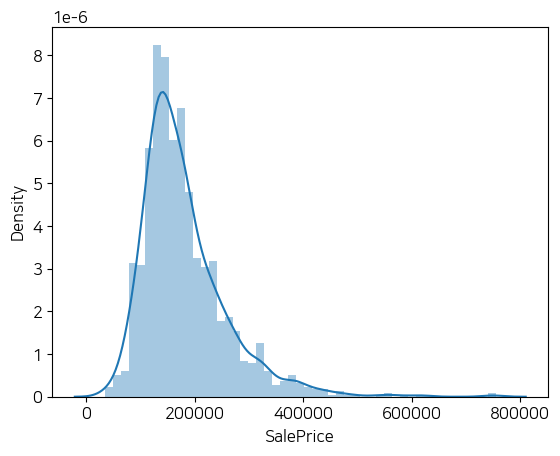

In [13]:
sns.distplot(house_df['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

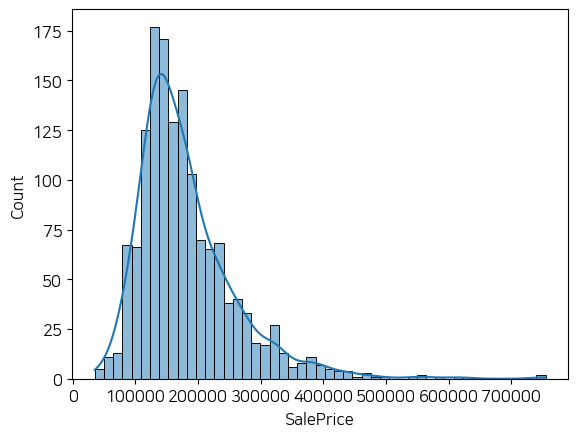

In [15]:
sns.histplot(data=house_df, x='SalePrice', kde=True)

In [16]:
log_saleprice = np.log1p(house_df['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

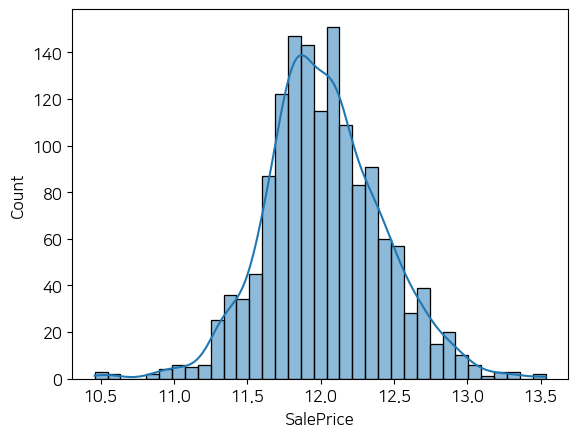

In [18]:
sns.histplot(x=log_saleprice, kde=True)

In [19]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [21]:
house_df.drop(columns=['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], inplace=True)

In [22]:
house_df.mean(numeric_only=True)

MSSubClass          56.897260
LotFrontage         70.049958
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
MasVnrArea         103.685262
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1978.506164
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea             2.758904
MiscVal   

In [23]:
house_df.fillna(house_df.mean(numeric_only=True), inplace=True)

In [27]:
isnull_series = house_df.isnull().sum()
null_columns = isnull_series[isnull_series>0].sort_values(ascending=False)

In [28]:
null_columns.index

Index(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'Electrical'],
      dtype='object')

In [29]:
house_df.dtypes[null_columns.index]

GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
BsmtExposure    object
BsmtFinType2    object
BsmtQual        object
BsmtCond        object
BsmtFinType1    object
Electrical      object
dtype: object

In [30]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [31]:
house_df.shape

(1460, 74)

In [34]:
house_df_ohe = pd.get_dummies(house_df, dtype=int)

In [35]:
house_df_ohe.shape

(1460, 267)

In [36]:
isnull_series = house_df_ohe.isnull().sum()
isnull_series[isnull_series>0].sort_values(ascending=False)

Series([], dtype: int64)

In [45]:
def get_rmse(model, x_test, y_test):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model, x_test, y_test)
        rmses.append(rmse)
    return rmses

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [49]:
y = house_df_ohe['SalePrice']
x = house_df_ohe.drop(columns=['SalePrice'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)

ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.127
Lasso 로그 변환된 RMSE: 0.176


[0.1317034654439697, 0.12743057784210612, 0.17628250556471403]

In [48]:
np.expm1(0.132)

0.1411083192672351

In [50]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=x.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [51]:
get_top_bottom_coef(ridge_reg)

(RoofMatl_WdShngl        0.230742
 Neighborhood_StoneBr    0.155155
 RoofMatl_CompShg        0.151581
 Condition2_Norm         0.126328
 Neighborhood_NridgHt    0.124363
 Neighborhood_Crawfor    0.122331
 RoofMatl_WdShake        0.109598
 Heating_GasW            0.101213
 Functional_Typ          0.094713
 MSZoning_FV             0.090461
 dtype: float64,
 GarageQual_Fa          -0.067687
 Neighborhood_Edwards   -0.077468
 GarageType_2Types      -0.078784
 Utilities_NoSeWa       -0.084611
 Heating_Grav           -0.185985
 Neighborhood_MeadowV   -0.193195
 Functional_Maj2        -0.247422
 MSZoning_C (all)       -0.276990
 Condition2_PosN        -0.348042
 RoofMatl_ClyTile       -0.702895
 dtype: float64)

In [52]:
get_top_bottom_coef(lasso_reg)

(YearBuilt       0.002551
 YearRemodAdd    0.001191
 GarageArea      0.000379
 GrLivArea       0.000305
 WoodDeckSF      0.000183
 TotalBsmtSF     0.000158
 ScreenPorch     0.000154
 BsmtFinSF1      0.000029
 MasVnrArea      0.000019
 2ndFlrSF        0.000017
 dtype: float64,
 Condition2_PosN         -0.000000e+00
 Condition2_RRAe         -0.000000e+00
 Condition2_RRAn         -0.000000e+00
 Condition2_RRNn         -0.000000e+00
 BldgType_1Fam            0.000000e+00
 BldgType_2fmCon         -0.000000e+00
 BldgType_Duplex         -0.000000e+00
 SaleCondition_Partial    0.000000e+00
 MiscVal                 -6.186043e-07
 PoolArea                -6.327429e-05
 dtype: float64)

In [53]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10),ncols=3,nrows=1)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        axs[i_num].set_title(model.__class__.__name__,size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-128)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

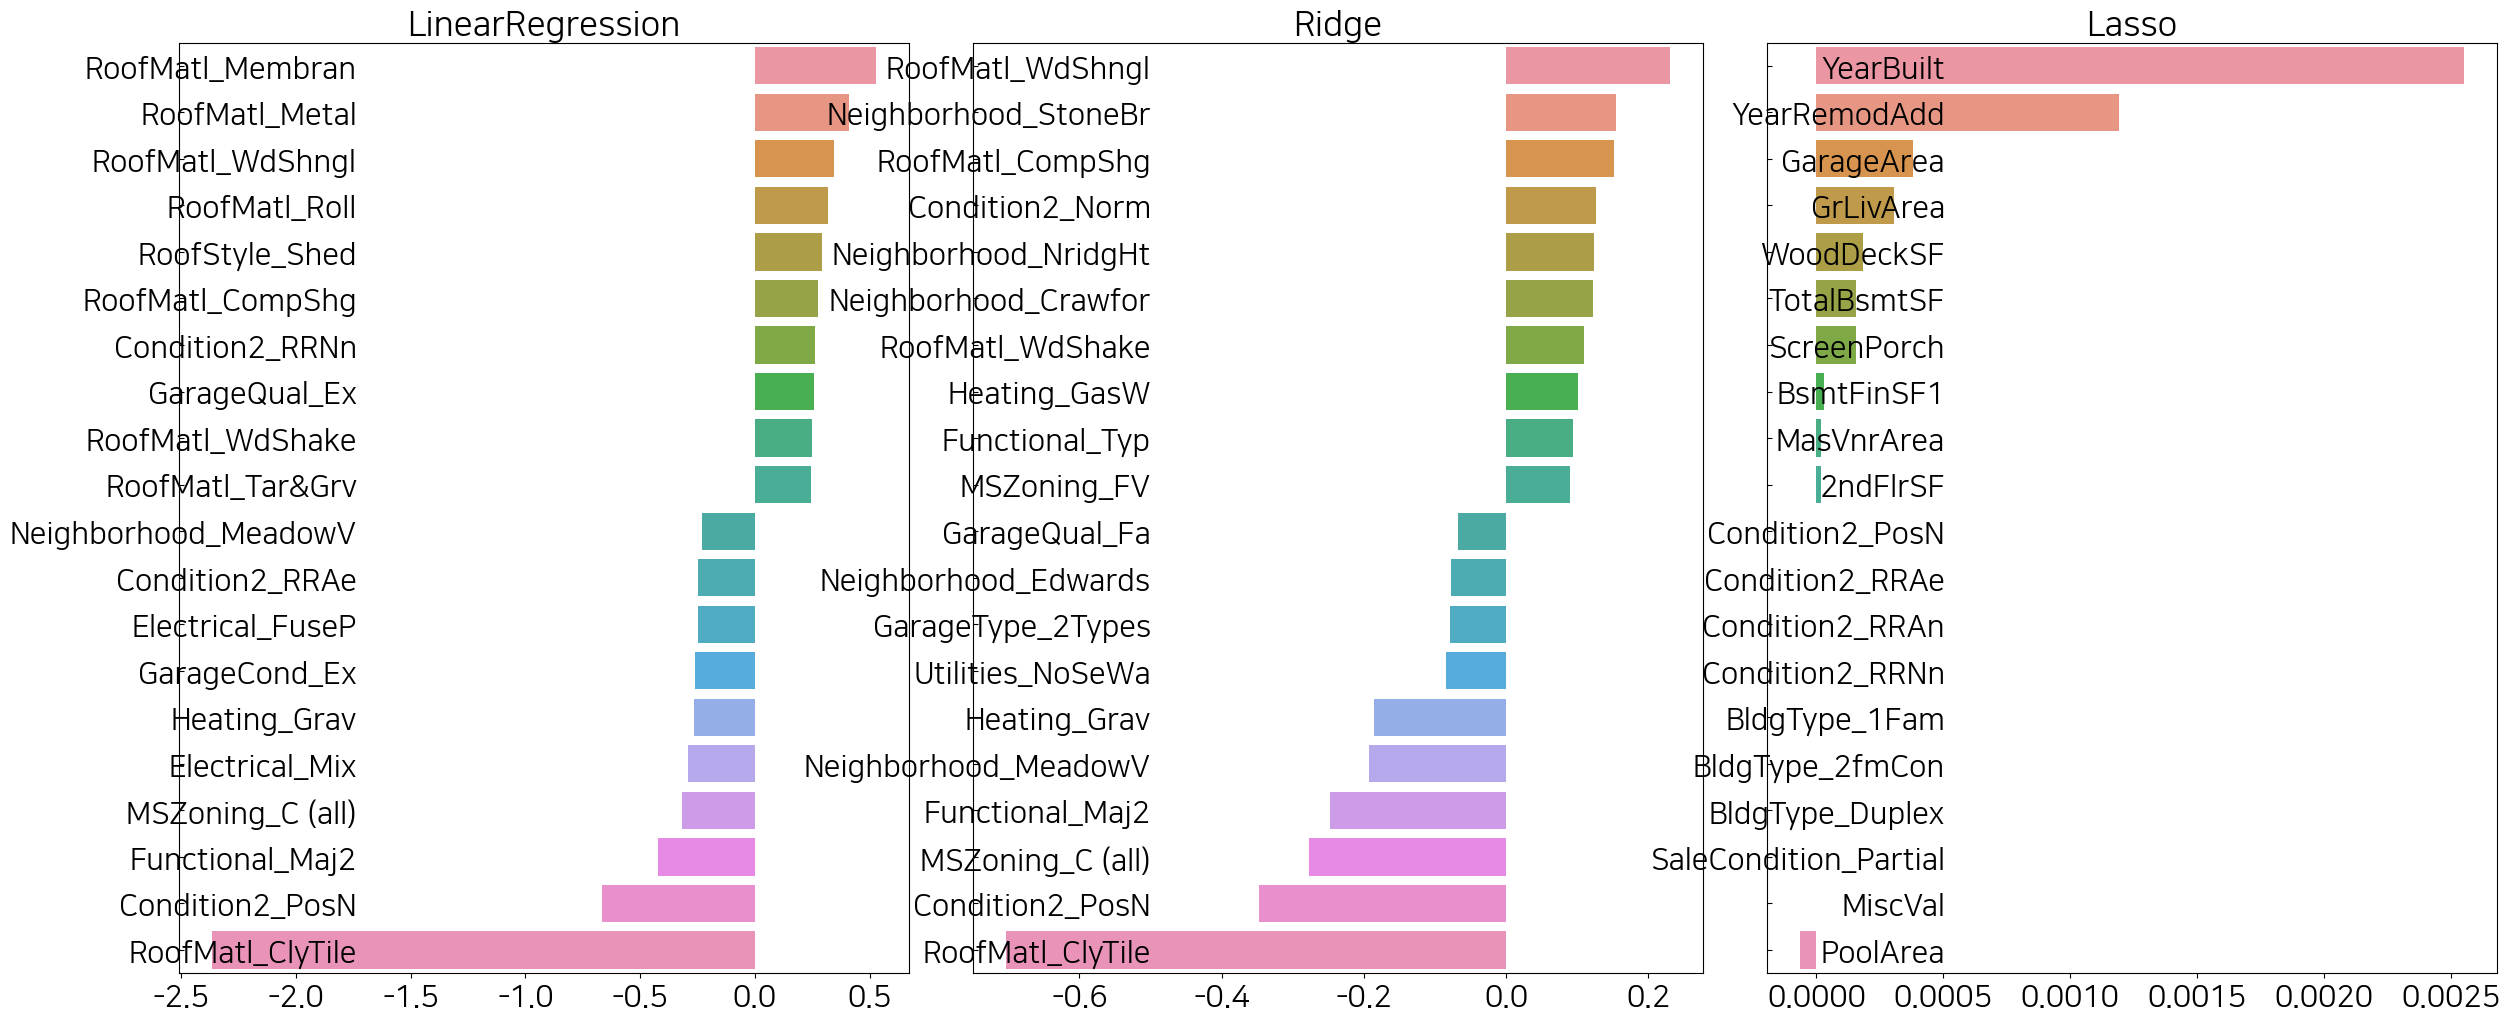

In [54]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [55]:
def get_avg_rmse_cv(models):
    from sklearn.model_selection import cross_val_score
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} rmse 값 리스트 : {rmse_list}')
        print(f'{model.__class__.__name__} rmse 값 평  균 : {rmse_avg}')

In [57]:
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)
# LinearRegression 로그 변환된 RMSE: 0.132
# Ridge 로그 변환된 RMSE: 0.127
# Lasso 로그 변환된 RMSE: 0.176
# [0.1317034654439697, 0.12743057784210612, 0.17628250556471403]

LinearRegression rmse 값 리스트 : [0.13490851 0.16426367 0.16637528 0.11076123 0.19760965]
LinearRegression rmse 값 평  균 : 0.15478366810571334
Ridge rmse 값 리스트 : [0.11733805 0.15411575 0.14184728 0.11638648 0.1886241 ]
Ridge rmse 값 평  균 : 0.1436623338950069
Lasso rmse 값 리스트 : [0.16077499 0.20437243 0.17676683 0.18127643 0.2651206 ]
Lasso rmse 값 평  균 : 0.19766225731814294


In [60]:
def print_best_params(model,params):
    from sklearn.model_selection import GridSearchCV
    grid_model = GridSearchCV(model,
                              param_grid=params,
                              scoring='neg_mean_squared_error',
                              cv=5)
    grid_model.fit(x,y)
    rmse = np.sqrt(-grid_model.best_score_)
    print(f'최적 rmse:{rmse}, 최적 alpha :{grid_model.best_params_}')

In [61]:
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)
# Ridge rmse 값 평  균 : 0.14385021807917392
# Lasso rmse 값 평  균 : 0.1976622573181429

최적 rmse:0.1416640904063777, 최적 alpha :{'alpha': 10}
최적 rmse:0.14195569268952374, 최적 alpha :{'alpha': 0.001}


In [65]:
lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(x_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)
# LinearRegression  로그 변환된 RMSE :  0.13189576579154072
# Ridge  로그 변환된 RMSE :  0.12750846334053154
# Lasso  로그 변환된 RMSE :  0.17628250556471395

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


[0.1317034654439697, 0.12393954255752428, 0.11995999790895515]

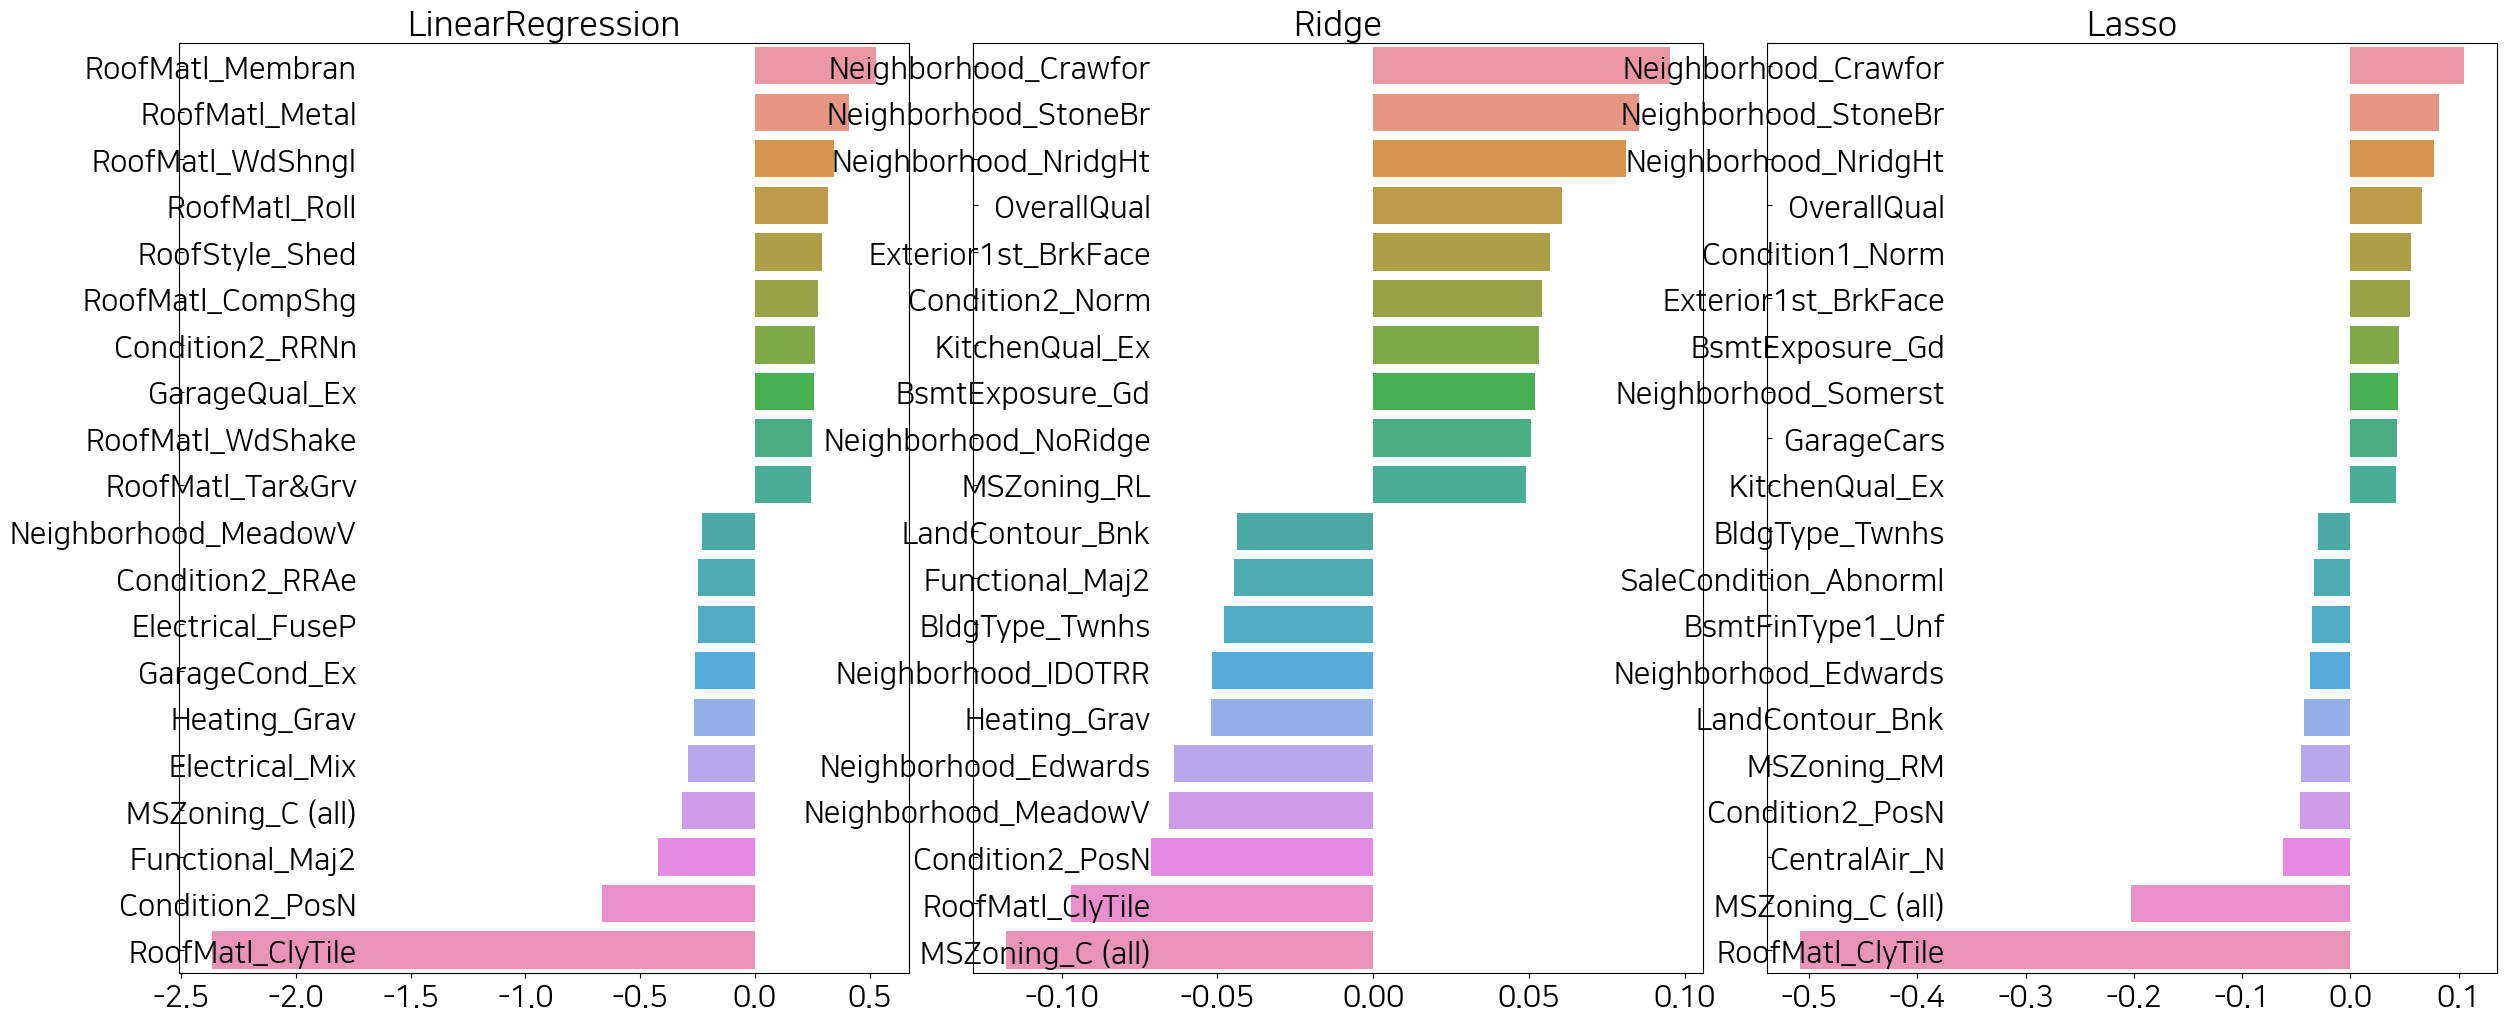

In [66]:
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)